In [1]:
print("Aur batao kaise ho")

Aur batao kaise ho


In [2]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print("tensorflow" + tf.__version__)
import tensorflow.keras.layers as tfl
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomContrast
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
import shutil
import zipfile
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras import backend as K
import matplotlib.patches as patches



device_name = tf.test.gpu_device_name()

if "GPU" in device_name:
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU not found.')


tensorflow2.15.0
GPU not found.


In [3]:
from tensorflow.keras.models import Model

In [4]:
image_dir = r'C:\Users\admin\Documents\ML\Lab06\images1\faces'
bbox_path = r'C:\Users\admin\Documents\ML\Lab06\faces.csv'

image_path = sorted([os.path.join(image_dir, filename) for filename in os.listdir(image_dir)], key=lambda x: x.split('/')[-1].split('.')[0])

bbox_df = pd.read_csv(bbox_path).sort_values(by='image_name').reset_index(drop=True)

bbox_df

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\admin\\Documents\\ML\\Lab06\\images1\\faces'

In [ ]:

def preprocess_image(file_path):
    # Load and decode the image
    img = tf.io.read_file(file_path)
    # You can adjust channels based on your images (3 for RGB)
    img = tf.image.decode_jpeg(img, channels=3) # Returned as uint8
    # Normalize the pixel values to [0, 256]
    img = tf.image.convert_image_dtype(img, tf.uint8)
    return img


def tuple_to_dict(image, bboxes, bounding_box_format):
    boxes = keras_cv.bounding_box.convert_format(
        bboxes,
        images=image,
        source="xyxy",
        target=bounding_box_format,
    )
    # Assuming 'boxes' is a tensor with a known shape
    num_rows = tf.shape(boxes)[0]

    # Create a new tensor with the same number of rows and all elements set to 14
    new_classes = tf.fill([num_rows], 0)
    new_boxes = tf.cast(boxes, dtype=tf.float32)
    
    bounding_boxes = {
        "classes": new_classes,
        "boxes": new_boxes,
    }
    return {"images": tf.cast(image, tf.float32), "bounding_boxes": bounding_boxes}

ImportError: cannot import name 'keras_cv' from 'keras' (C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\__init__.py)

In [ ]:
# Drop unnecessary height and width of the images from dataset
bbox_df = bbox_df[['image_name','x0','y0','x1','y1']]

bbox_grouped = bbox_df.groupby('image_name')

def bbox_dataset_generator():
    for _, group in bbox_grouped:
        bounding_boxes = group[['x0','y0','x1','y1']].values
        yield bounding_boxes

bbox_dataset = tf.data.Dataset.from_generator(bbox_dataset_generator, output_signature=tf.TensorSpec(shape=(None, 4),
                                              dtype=tf.float32))

image_dataset = tf.data.Dataset.from_tensor_slices(image_path)

# Convert file paths to images of uint8

image_dataset = image_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Combine images with array of corresponding bounding boxes
dataset = tf.data.Dataset.zip((image_dataset, bbox_dataset))

# Creat dictionary of images and bounding boxes
bounding_box_format = 'xyxy'
dataset = dataset.map(lambda x, y: tuple_to_dict(x, y, bounding_box_format=bounding_box_format),
                      num_parallel_calls=tf.data.AUTOTUNE)


NameError: in user code:

    File "C:\Users\admin\AppData\Local\Temp\ipykernel_20300\938512528.py", line 25, in None  *
        lambda x, y: tuple_to_dict(x, y, bounding_box_format=bounding_box_format)
    File "C:\Users\admin\AppData\Local\Temp\ipykernel_20300\2334885753.py", line 12, in tuple_to_dict  *
        boxes = keras_cv.bounding_box.convert_format(

    NameError: name 'keras_cv' is not defined


In [5]:
# new code------------------------------------------------
import os
import shutil
import random
import pathlib

# Set the paths
data_folder = r'C:\Users\admin\Documents\ML\images1\faces'
train_folder = r'C:\Users\admin\Documents\ML\training'
val_folder = r'C:\Users\admin\Documents\ML\validation'
test_folder = r'C:\Users\admin\Documents\ML\testing'

# Create directories if they don't exist
for folder in [train_folder, val_folder, test_folder]:
    pathlib.Path(folder).mkdir(parents=True, exist_ok=True)

# Get a list of all image files in the data folder
image_files = [f for f in os.listdir(data_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Shuffle the list of image files
random.shuffle(image_files)

# Define the proportions for training, validation, and testing sets (adjust as needed)
train_split = 0.7  # 70% for training
val_split = 0.15   # 15% for validation
test_split = 0.15  # 15% for testing

# Calculate the number of images for each set
num_images = len(image_files)
num_train = int(train_split * num_images)
num_val = int(val_split * num_images)

# Split the image files into training, validation, and testing sets
train_images = image_files[:num_train]
val_images = image_files[num_train:num_train + num_val]
test_images = image_files[num_train + num_val:]

# Function to move images to their respective folders
def move_images(image_list, destination_folder):
    for img in image_list:
        shutil.move(os.path.join(data_folder, img), os.path.join(destination_folder, img))

# Move images to respective folders
move_images(train_images, train_folder)
move_images(val_images, val_folder)
move_images(test_images, test_folder)


In [6]:
# Building a Deep Learning using functiona api
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16
print("Imports successfull")

Imports successfull


In [7]:
vgg = VGG16(include_top=False)

In [8]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [14]:
# Building an instance of NN model
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(4, activation='sigmoid')(class1)

    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f1)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [15]:
facetracker = build_model()

In [16]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_4[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d_2 (Gl  (None, 512)                  0         ['vgg16[0][0]']               
 obalMaxPooling2D)                                                                                
                                                                                              

In [20]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images)
X, y = train_dataset.as_numpy_iterator().next[1]

TypeError: 'method' object is not subscriptable

In [2]:
import cv2
import os 
# Read the image
folder_path = r'C:\Users\admin\Documents\ML\training'
image_list = []
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.jpg','.jpeg','.png')):
        image_line = os.path.join(folder_path,filename)
        image = cv2.imread(image_line)
        # Normalize pixel values to range [0, 1]
        resized_image = cv2.resize(image, (256, 256))

        # Normalize pixel values to range [0, 1]
        image = resized_image / 255.0

        if image is not None:
            image_list.append(image)

# Wait for 'Enter' key press (key code for 'Enter' is 13)


In [3]:
print(len(image_list[2]))


256


In [26]:
# Load the cascade classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Check if the classifier is loaded properly
if face_cascade.empty():
    print("Error: Cascade Classifier not loaded properly.")
else:
    # Use the classifier for object detection
    # For instance, you might use detectMultiScale() method here
    pass  # Perform object detection operations using detectMultiScale()

In [40]:
image1 = cv2.imread(r'C:\Users\admin\Documents\ML\training\00000011.jpg', cv2.IMREAD_GRAYSCALE)
bbox = face_cascade.detectMultiScale(image_list[1], 1.1,3)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1389: error: (-215:Assertion failed) scaleFactor > 1 && _image.depth() == CV_8U in function 'cv::CascadeClassifierImpl::detectMultiScale'


In [8]:
from cv2 import rectangle
for box in bbox:
    x, y, w, h = box
    x2, y2 = x+w, y+h
    # Drawing rectangel over the image
    rectangle(image_list[1], (x,y),(x2,y2),(0,0,255),1)
cv2.imshow('face detection', image_list[1])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
# ---------------------------------------    TRYING WITH MTCNN MODEL ----------------------------------------------#
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)


0.1.0


In [42]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = r'C:\Users\admin\Documents\ML\training\00000011.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
 print(face)



1/1 [==============================] - 0s 155ms/step
{'box': [1576, 899, 298, 349], 'confidence': 0.9998929500579834, 'keypoints': {'left_eye': (1661, 1009), 'right_eye': (1734, 1054), 'nose': (1618, 1063), 'mouth_left': (1590, 1132), 'mouth_right': (1651, 1170)}}


In [46]:
print(face.keys)

<built-in method keys of dict object at 0x000001ACEED10880>


In [51]:
from matplotlib.patches import Rectangle
# get coordinates
x, y, width, height = face['box']
# create the shape
rect = Rectangle((x, y), width, height, fill=False, color='Red')
ax.add_patch(rect)

1/1 [==============================] - 0s 150ms/step


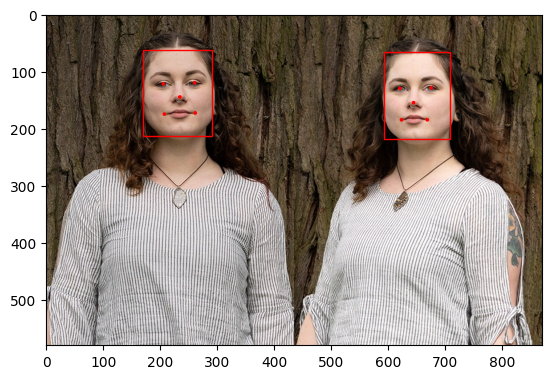

In [57]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)

        # Drawing the dots to identify eye and nose present in images
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    pyplot.show()
 
filename = r'C:\Users\admin\Documents\ML\training\00000087.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [58]:
print(faces)

[{'box': [170, 61, 121, 152], 'confidence': 0.9996720552444458, 'keypoints': {'left_eye': (205, 121), 'right_eye': (260, 119), 'nose': (234, 144), 'mouth_left': (207, 174), 'mouth_right': (261, 172)}}, {'box': [593, 65, 115, 153], 'confidence': 0.9987645149230957, 'keypoints': {'left_eye': (620, 129), 'right_eye': (675, 128), 'nose': (644, 154), 'mouth_left': (623, 184), 'mouth_right': (668, 184)}}]


In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import os
import tensorflow as tf

# Path to train and test directory
dir_ = os.path.join(r'C:\Users\admin\Documents\ML\images1\faces')


# Generate training and test data with Image Generator
train_datagen = ImageDataGenerator(rescale=1/255,
                                  validation_split = 0.2)


train_generator = train_datagen.flow_from_directory(dir_,target_size=(100, 100),
                                                   batch_size= 1920,
                                                   class_mode='categorical',
                                                   shuffle=False,
                                                   subset = 'training')

test_generator = train_datagen.flow_from_directory(dir_,
                                                          target_size = (100,100),
                                                          batch_size = 480,
                                                          class_mode = 'categorical',
                                                          shuffle=False,
                                                          subset = 'validation')


# Fetch the data and the labels
x_train, y_train = next(train_generator)
x_test, y_test  = next(test_generator)

# Fix the filepath
test_filepath = []
for filepath in test_generator.filepaths:
    filepath = filepath.replace('\\', '/')
    test_filepath.append(filepath)


Found 1762 images belonging to 3 classes.
Found 440 images belonging to 3 classes.


In [7]:
model = Sequential([
    
    # First convolution
        Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
        MaxPooling2D(2, 2),
    
    # Second convolution
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
    
    # Third convolution
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
    
        Flatten(),
    
    # Dense hidden layer
        Dense(512, activation='relu'),
        Dropout(0.2),
    
    # Output neuron. 
        Dense(3, activation='softmax') 
])

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
      train_generator,  
      epochs=80,
      verbose=1)

Epoch 1/80


1/1 [==============================] - 18s 18s/step - loss: 1.1507 - accuracy: 0.1799
Epoch 2/80
1/1 [==============================] - 14s 14s/step - loss: 1.7886 - accuracy: 0.6998
Epoch 3/80
1/1 [==============================] - 11s 11s/step - loss: 1.0345 - accuracy: 0.6998
Epoch 4/80
1/1 [==============================] - 10s 10s/step - loss: 0.8321 - accuracy: 0.6998
Epoch 5/80
1/1 [==============================] - 10s 10s/step - loss: 0.8930 - accuracy: 0.6998
Epoch 6/80
1/1 [==============================] - 11s 11s/step - loss: 0.9326 - accuracy: 0.6998
Epoch 7/80
1/1 [==============================] - 14s 14s/step - loss: 0.9368 - accuracy: 0.6998
Epoch 8/80
1/1 [==============================] - 11s 11s/step - loss: 0.9209 - accuracy: 0.6998
Epoch 9/80
1/1 [==============================] - 11s 11s/step - loss: 0.8930 - accuracy: 0.6998
Epoch 10/80
1/1 [==============================] - 12s 12s/step - loss: 0.8571 - accuracy: 0.6998
Epoch 11/80
1/1 [==========

In [4]:
import numpy as np
from skimage import io
from tensorflow.keras.preprocessing import image
import cv2
url = r'C:\Users\admin\Documents\ML\images1\faces\training\00000416.jpg'
def read_and_transform_img(url):

    img = cv2.imread(url)
    img = cv2.resize(img, (100,100))
    
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    return img

images = read_and_transform_img(url)

preds = model.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)



print(pct)

NameError: name 'model' is not defined

In [41]:
# Library Installation
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

In [42]:
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 99.5, 99.5, -0.5)

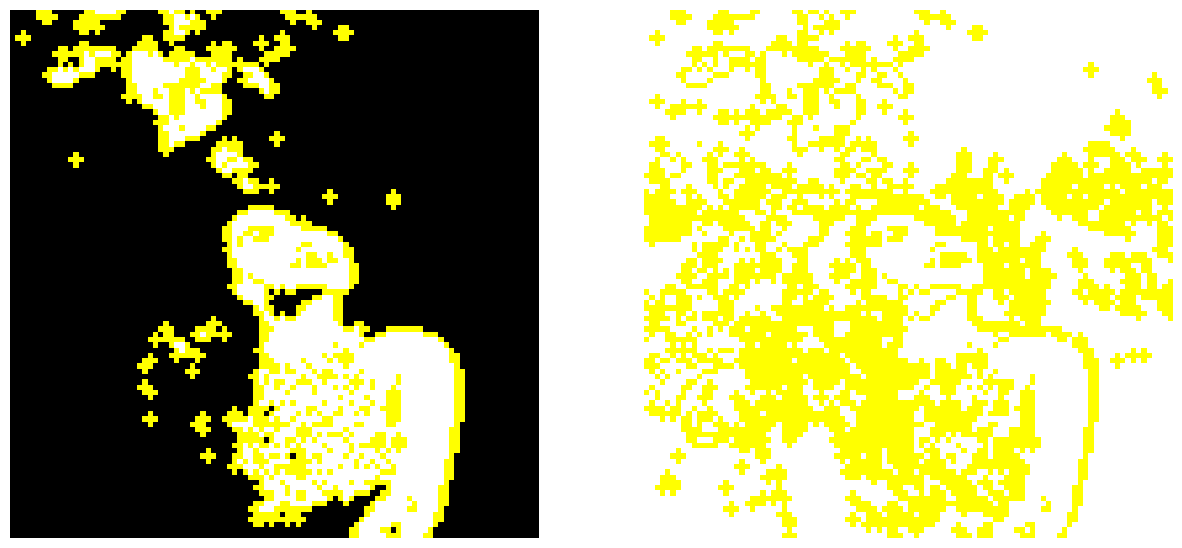

In [43]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')